### Notebook to Build Dashboard to Pull Benchmark Prices and Spreads for Arbitrage

In [2]:
pip install spgci

  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached charset_normalizer-3.4.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (153 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)
Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
Using cached numpy-

In [3]:
import spgci
print(spgci.__version__)

0.0.75


In [4]:
import spgci as ci

# Initialize credentials and MarketData module
ci.set_credentials(username, password, appkey)
mdd = ci.MarketData()

# Pulling current assessments for Brent and WTI symbols
symbols = df_platts = mdd.get_assessments_by_symbol_current(symbol=symbols)

NameError: name 'username' is not defined

## To create dedicated environment for CA dashboard; to run in bash
```bash
conda create -n commercialanalyst_env python=3.10
conda activate commercialanalyst_env
```

### Install ipykernel and any packages
```bash
conda install ipykernel
```

### Register the kernel with Jupyter
```bash
python -m ipykernel install --user --name commercialanalyst_env --display-name "Python (commercialanalyst_env)"
```

In [ ]:
# Install required packages from Yahoo Finance
!pip install yfinance pandas numpy matplotlib

  Using cached yfinance-1.1.0-py2.py3-none-any.whl.metadata (6.1 kB)
  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached frozendict-2.4.7-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (23 kB)
  Using cached peewee-3.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached websockets-16.0-cp310-cp310-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (6.8 kB)
  Using cached cffi-2.0.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.6 kB)
Using cached yfinance-1.1.0-py2.py3-none-any.whl (129 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.6 MB/s  0:00:00 eta 0:00:01
Using cached cffi-2.0.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (216 kB)
   ━━━━━━━━━━━━━━━

## Reading in WTI Futures (NYMEX) and Brent Futures (ICE) Over 24 Months

In [ ]:
import yfinance as yf

# WTI Futures (NYMEX)
wti_ticker = yf.Ticker("CL=F")
df_wti = wti_ticker.history(period="2y")

# Brent Futures (ICE)
brent_ticker = yf.Ticker("BZ=F")
df_brent = brent_ticker.history(period="2y")

In [ ]:
df_wti.head()

(                                Open       High        Low      Close  Volume  \
 Date                                                                            
 2025-02-03 00:00:00-05:00  74.139999  75.180000  72.050003  73.160004  517853   
 2025-02-04 00:00:00-05:00  72.349998  73.349998  70.669998  72.699997  452961   
 2025-02-05 00:00:00-05:00  72.760002  72.970001  70.959999  71.029999  289902   
 2025-02-06 00:00:00-05:00  71.180000  71.849998  70.430000  70.610001  299037   
 2025-02-07 00:00:00-05:00  70.559998  71.410004  70.470001  71.000000  273766   
 
                            Dividends  Stock Splits  
 Date                                                
 2025-02-03 00:00:00-05:00        0.0           0.0  
 2025-02-04 00:00:00-05:00        0.0           0.0  
 2025-02-05 00:00:00-05:00        0.0           0.0  
 2025-02-06 00:00:00-05:00        0.0           0.0  
 2025-02-07 00:00:00-05:00        0.0           0.0  ,
                                 Open       H

In [5]:
df_brent.head()  

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00-05:00,76.820000,77.529999,75.040001,75.959999,75087,0.0,0.0
2025-02-04 00:00:00-05:00,75.519997,76.669998,74.129997,76.199997,62716,0.0,0.0
2025-02-05 00:00:00-05:00,76.080002,76.349998,74.550003,74.610001,30739,0.0,0.0
2025-02-06 00:00:00-05:00,74.599998,75.389999,74.089996,74.290001,41460,0.0,0.0
2025-02-07 00:00:00-05:00,74.199997,75.089996,74.190002,74.660004,35634,0.0,0.0


## WTI vs Brent over 24-Month Period

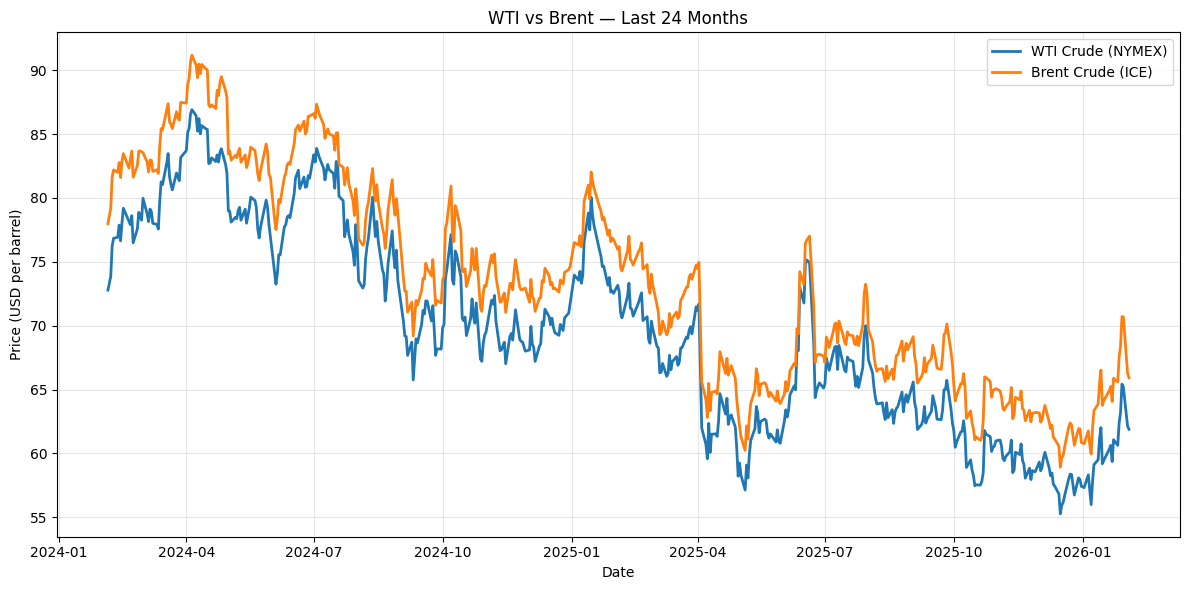

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
wti = yf.Ticker("CL=F").history(period="24mo")
brent = yf.Ticker("BZ=F").history(period="24mo")

# --- Keep only the settlement/close prices ---
wti = wti["Close"].rename("WTI")
brent = brent["Close"].rename("Brent")

# --- Align dates ---
df = (
    wti.to_frame()
    .join(brent.to_frame(), how="inner")
)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["WTI"], label="WTI Crude (NYMEX)", linewidth=2)
plt.plot(df.index, df["Brent"], label="Brent Crude (ICE)", linewidth=2)

plt.title("WTI vs Brent — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## WTI - Brent Spread over 24-Month Period

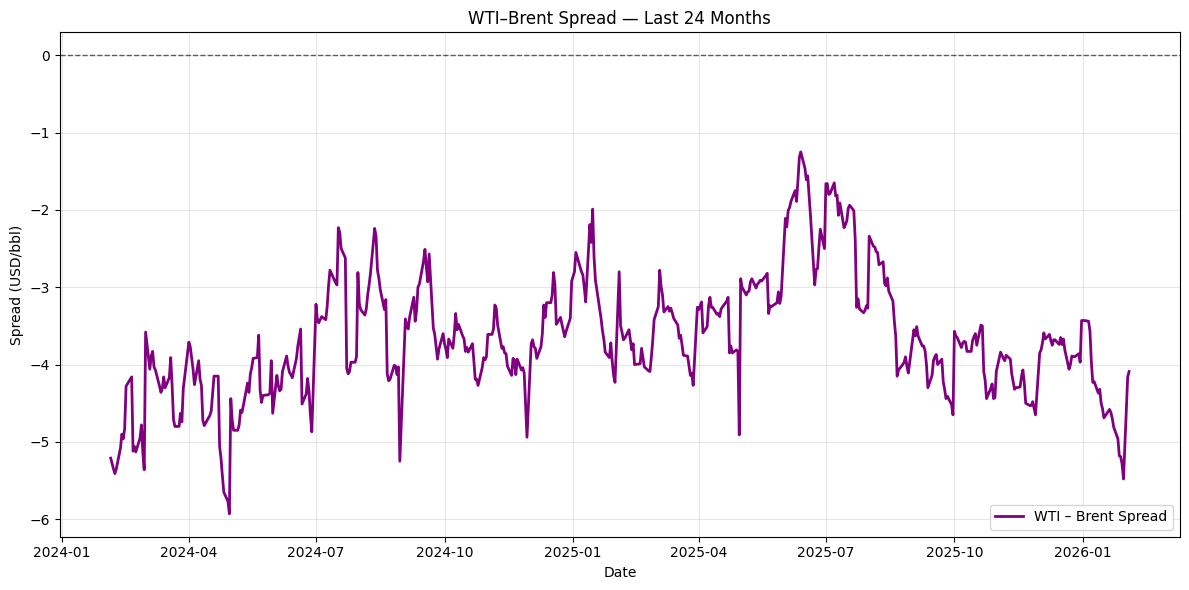

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
wti = yf.Ticker("CL=F").history(period="24mo")["Close"].rename("WTI")
brent = yf.Ticker("BZ=F").history(period="24mo")["Close"].rename("Brent")

# --- Align dates ---
df = (
    wti.to_frame()
    .join(brent.to_frame(), how="inner")
)

# --- Compute spread ---
df["WTI-Brent Spread"] = df["WTI"] - df["Brent"]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["WTI-Brent Spread"], label="WTI – Brent Spread", linewidth=2, color="purple")

plt.title("WTI–Brent Spread — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Spread (USD/bbl)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## JKM Futures (CME) Over 24 Months

In [ ]:
# JKM Futures (CME)
jkm_ticker = yf.Ticker("JKM=F")
df_jkm = jkm_ticker.history(period="2y")

In [9]:
df_jkm.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00-05:00,14.405,14.405,14.405,14.405,0,0.0,0.0
2025-02-04 00:00:00-05:00,14.495,14.495,14.495,14.495,0,0.0,0.0
2025-02-05 00:00:00-05:00,14.430,14.430,14.430,14.430,0,0.0,0.0
2025-02-06 00:00:00-05:00,14.515,14.515,14.515,14.515,0,0.0,0.0
2025-02-07 00:00:00-05:00,14.725,14.725,14.725,14.725,0,0.0,0.0


# TTF Futures over 24 Months

In [18]:
# TTF Futures (CME)
ttf_ticker = yf.Ticker("TTF=F")
df_ttf = ttf_ticker.history(period="2y")    

In [19]:
df_ttf.head()   

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,29.850000,29.850000,28.080000,28.341000,477,0.0,0.0
2024-02-06 00:00:00-05:00,28.420000,29.200001,27.799999,28.607000,334,0.0,0.0
2024-02-07 00:00:00-05:00,28.225000,28.844999,28.004999,28.186001,284,0.0,0.0
2024-02-08 00:00:00-05:00,28.150000,28.504999,27.665001,27.812000,585,0.0,0.0
2024-02-09 00:00:00-05:00,27.254999,27.450001,26.650000,27.117001,266,0.0,0.0


NBP Futures over 24 Months

In [20]:
# NBP-Futures (CME)
nbp_ticker = yf.Ticker("NBP=F")
df_nbp = nbp_ticker.history(period="2y")

In [21]:
df_nbp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,8.683,8.683,8.683,8.683,0,0.0,0.0
2024-02-06 00:00:00-05:00,8.817,8.817,8.817,8.817,0,0.0,0.0
2024-02-07 00:00:00-05:00,8.715,8.715,8.715,8.715,0,0.0,0.0
2024-02-08 00:00:00-05:00,8.617,8.617,8.617,8.617,0,0.0,0.0
2024-02-09 00:00:00-05:00,8.392,8.392,8.392,8.392,0,0.0,0.0


# JKM vs TTF over 24-Month Period

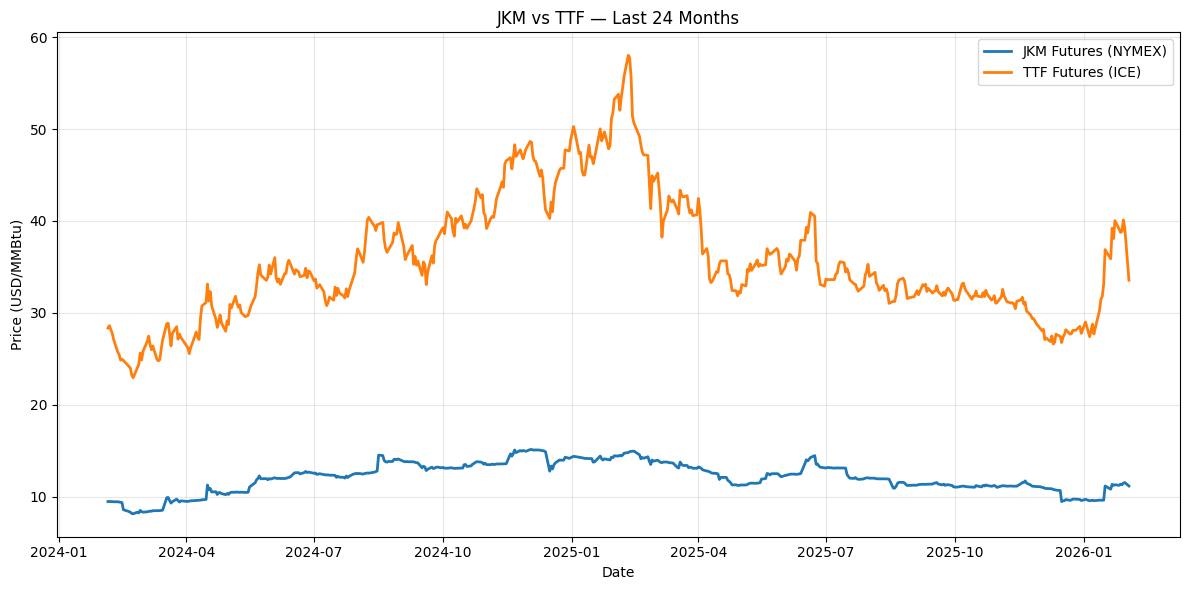

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
jkm = yf.Ticker("JKM=F").history(period="24mo")
ttf = yf.Ticker("TTF=F").history(period="24mo")

# --- Keep only the settlement/close prices ---
jkm = jkm["Close"]
ttf = ttf["Close"]

# --- Align dates ---
df = (
    jkm.rename("JKM")
    .to_frame()
    .join(ttf.rename("TTF"), how="inner")
)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["JKM"], label="JKM Futures (NYMEX)", linewidth=2)
plt.plot(df.index, df["TTF"], label="TTF Futures (ICE)", linewidth=2)

plt.title("JKM vs TTF — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD/MMBtu)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# JKM - TTF Spread Analysis over 24 Months

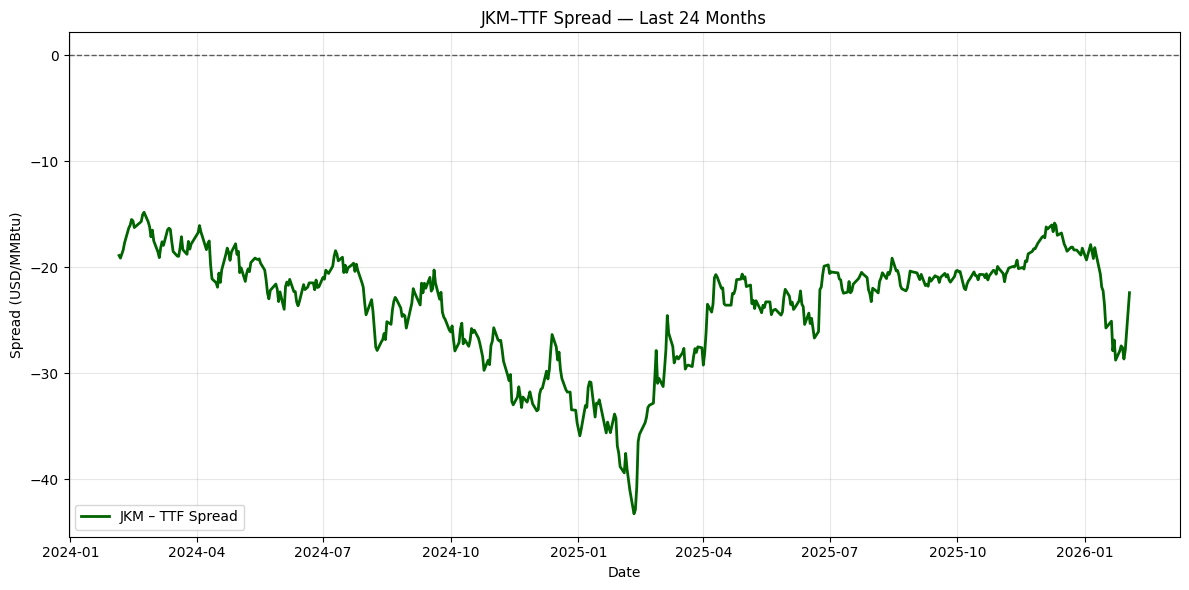

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
jkm = yf.Ticker("JKM=F").history(period="24mo")["Close"].rename("JKM")
ttf = yf.Ticker("TTF=F").history(period="24mo")["Close"].rename("TTF")

# --- Align dates ---
df = (
    jkm.to_frame()
    .join(ttf.to_frame(), how="inner")
)

# --- Compute spread ---
df["JKM-TTF Spread"] = df["JKM"] - df["TTF"]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["JKM-TTF Spread"], label="JKM – TTF Spread", linewidth=2, color="darkgreen")

plt.title("JKM–TTF Spread — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Spread (USD/MMBtu)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# JKM - NBP Spread Analysis over 24 Months

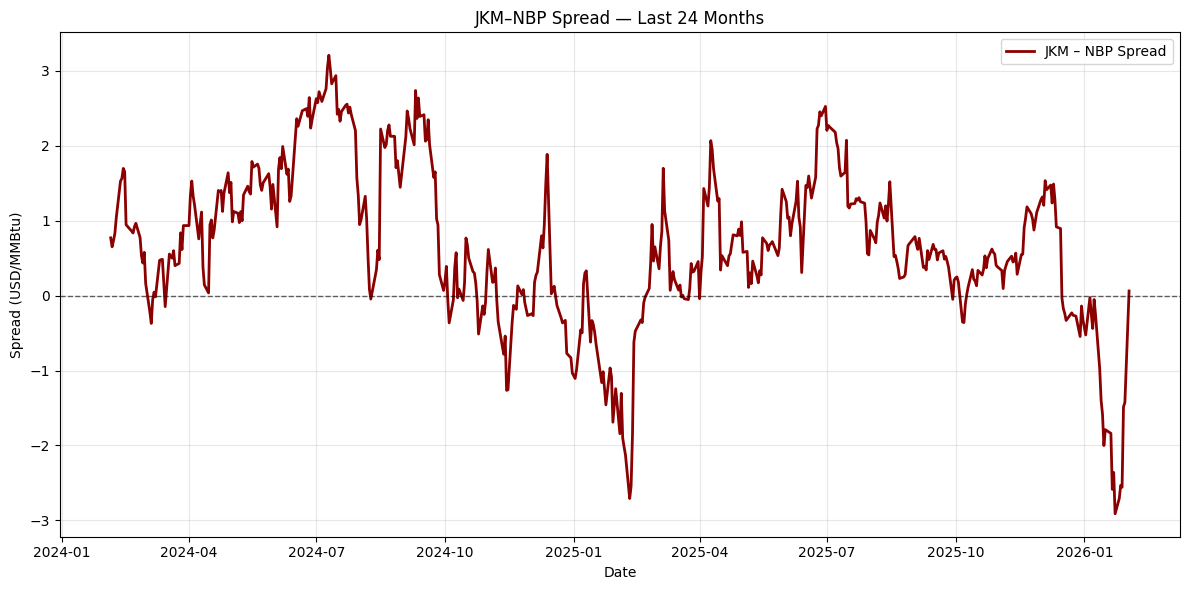

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
jkm = yf.Ticker("JKM=F").history(period="24mo")["Close"].rename("JKM")
nbp = yf.Ticker("NBP=F").history(period="24mo")["Close"].rename("NBP")

# --- Align dates ---
df = (
    jkm.to_frame()
    .join(nbp.to_frame(), how="inner")
)

# --- Compute spread ---
df["JKM-NBP Spread"] = df["JKM"] - df["NBP"]

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["JKM-NBP Spread"], label="JKM – NBP Spread", linewidth=2, color="darkred")

plt.title("JKM–NBP Spread — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Spread (USD/MMBtu)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

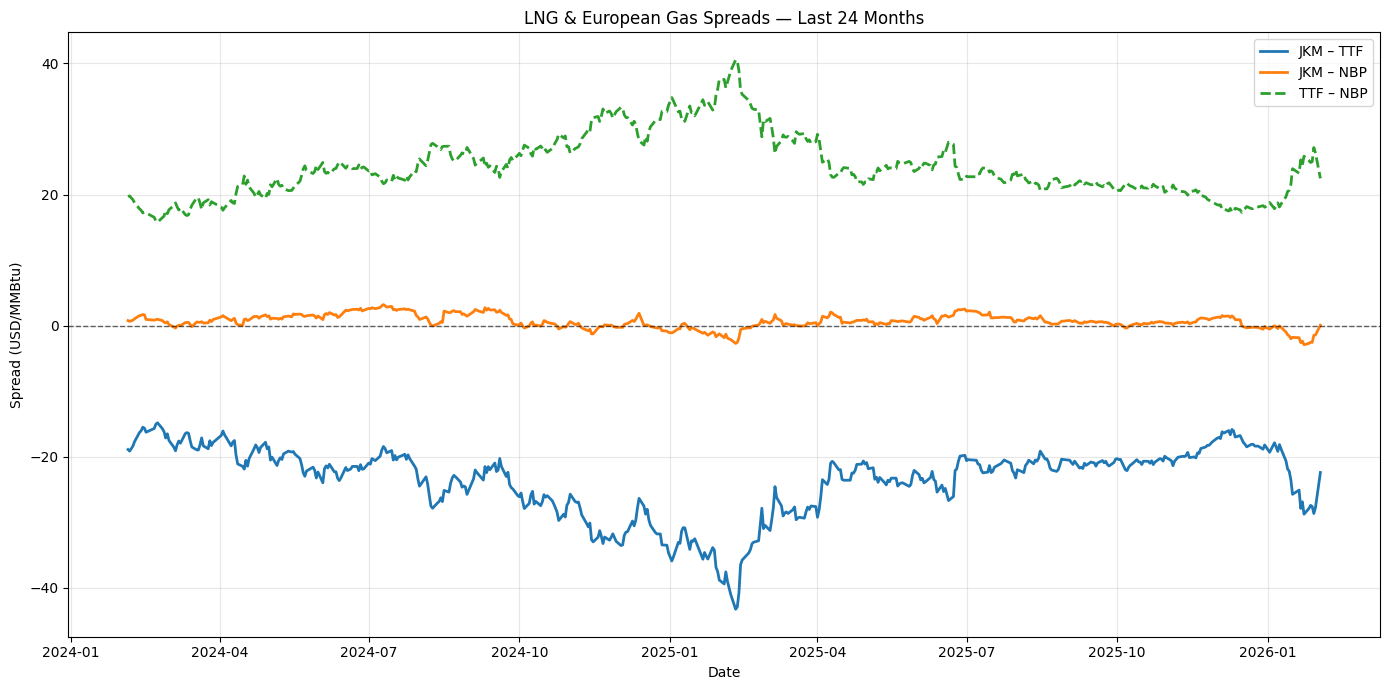

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
jkm = yf.Ticker("JKM=F").history(period="24mo")["Close"].rename("JKM")
ttf = yf.Ticker("TTF=F").history(period="24mo")["Close"].rename("TTF")
nbp = yf.Ticker("NBP=F").history(period="24mo")["Close"].rename("NBP")

# --- Align dates ---
df = (
    jkm.to_frame()
    .join(ttf.to_frame(), how="inner")
    .join(nbp.to_frame(), how="inner")
)

# --- Compute spreads ---
df["JKM - TTF"] = df["JKM"] - df["TTF"]
df["JKM - NBP"] = df["JKM"] - df["NBP"]
df["TTF - NBP"] = df["TTF"] - df["NBP"]   # optional but useful

# --- Plot ---
plt.figure(figsize=(14, 7))

plt.plot(df.index, df["JKM - TTF"], label="JKM – TTF", linewidth=2)
plt.plot(df.index, df["JKM - NBP"], label="JKM – NBP", linewidth=2)
plt.plot(df.index, df["TTF - NBP"], label="TTF – NBP", linewidth=2, linestyle="--")

plt.title("LNG & European Gas Spreads — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Spread (USD/MMBtu)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Full LNG analytics dashboard


/tmp/ipykernel_29689/3134257653.py:45: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = df.pct_change()
/tmp/ipykernel_29689/3134257653.py:51: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = df.pct_change().dropna()


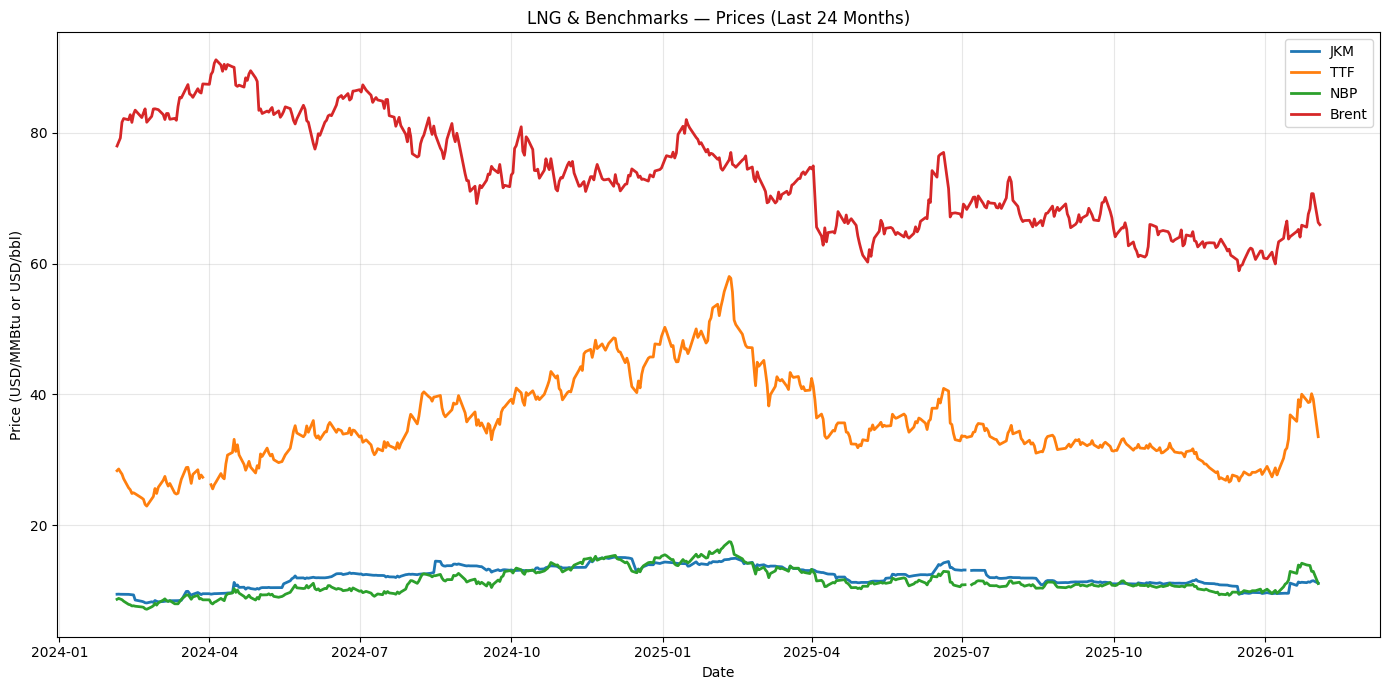

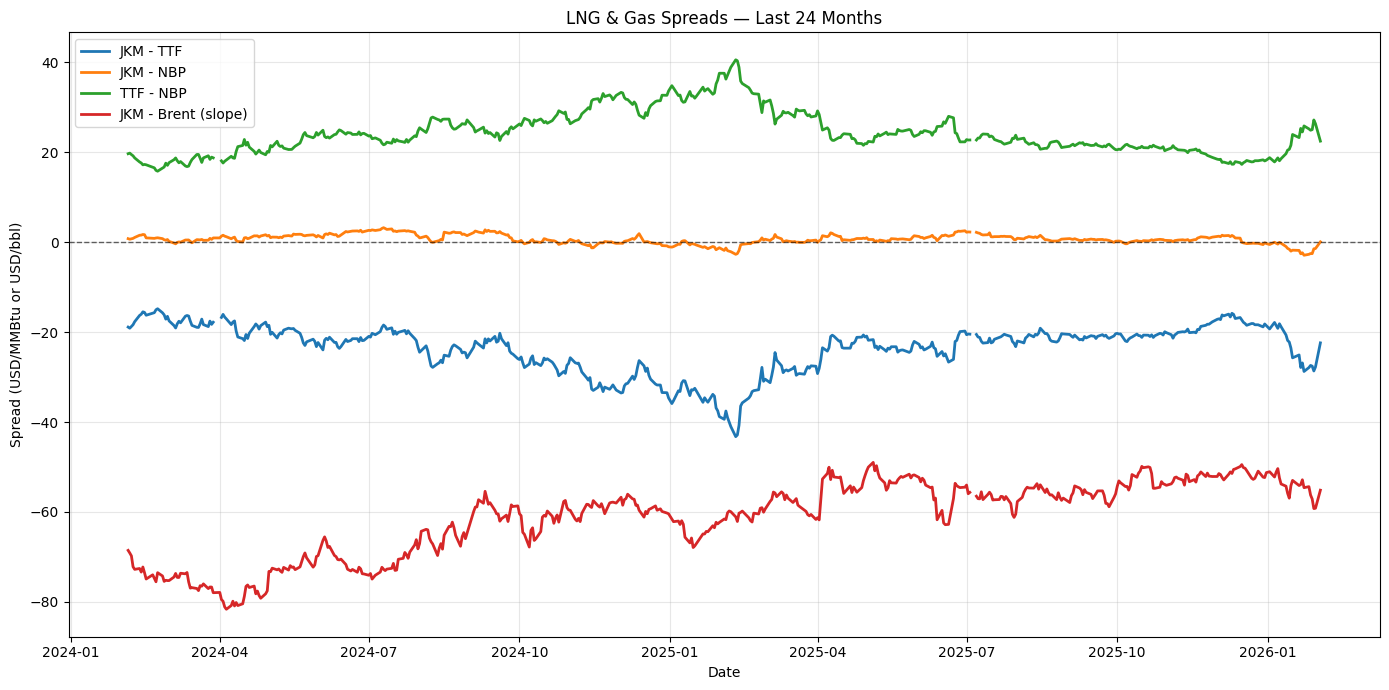

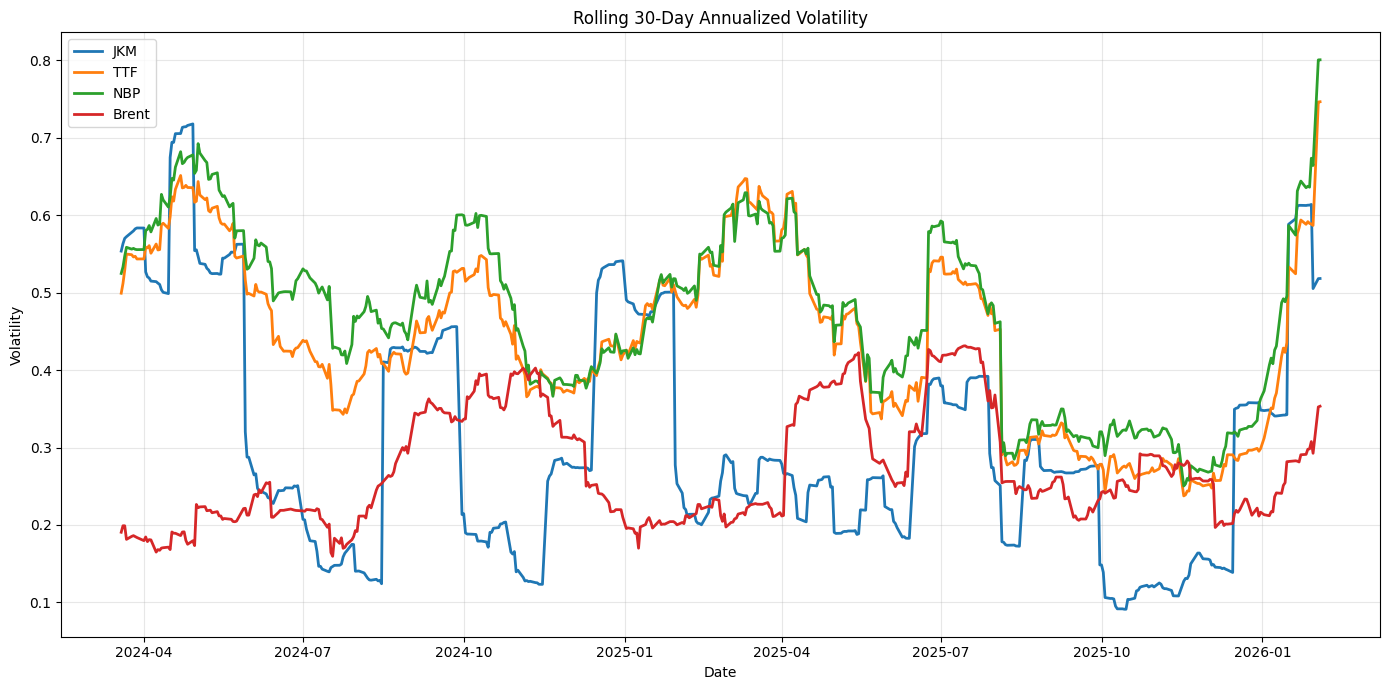

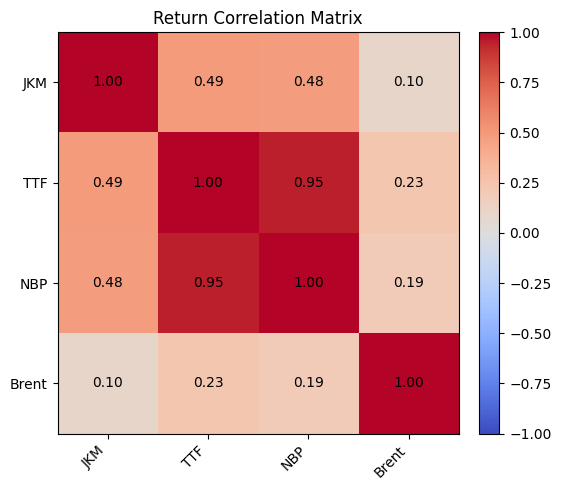

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
TICKERS = {
    "JKM": "JKM=F",
    "TTF": "TTF=F",
    "NBP": "NBP=F",
    "Brent": "BZ=F",
}
PERIOD = "24mo"
ROLL_WINDOW = 30  # days for rolling vol


# -----------------------------
# Data fetch
# -----------------------------
def fetch_prices(tickers: dict, period: str = "24mo") -> pd.DataFrame:
    frames = []
    for name, ticker in tickers.items():
        hist = yf.Ticker(ticker).history(period=period)["Close"].rename(name)
        frames.append(hist)
    df = pd.concat(frames, axis=1)
    df = df.dropna(how="all")
    return df


# -----------------------------
# Derived series
# -----------------------------
def compute_spreads(df: pd.DataFrame) -> pd.DataFrame:
    spreads = pd.DataFrame(index=df.index)
    spreads["JKM - TTF"] = df["JKM"] - df["TTF"]
    spreads["JKM - NBP"] = df["JKM"] - df["NBP"]
    spreads["TTF - NBP"] = df["TTF"] - df["NBP"]
    spreads["JKM - Brent (slope)"] = df["JKM"] - df["Brent"]
    return spreads


def compute_rolling_vol(df: pd.DataFrame, window: int = 30) -> pd.DataFrame:
    rets = df.pct_change()
    vol = rets.rolling(window).std() * np.sqrt(252)  # annualized
    return vol


def compute_correlations(df: pd.DataFrame) -> pd.DataFrame:
    rets = df.pct_change().dropna()
    return rets.corr()


# -----------------------------
# Plotting helpers
# -----------------------------
def plot_prices(df: pd.DataFrame):
    plt.figure(figsize=(14, 7))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col, linewidth=2)
    plt.title("LNG & Benchmarks — Prices (Last 24 Months)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD/MMBtu or USD/bbl)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_spreads(spreads: pd.DataFrame):
    plt.figure(figsize=(14, 7))
    for col in spreads.columns:
        plt.plot(spreads.index, spreads[col], label=col, linewidth=2)
    plt.title("LNG & Gas Spreads — Last 24 Months")
    plt.xlabel("Date")
    plt.ylabel("Spread (USD/MMBtu or USD/bbl)")
    plt.grid(True, alpha=0.3)
    plt.axhline(0, color="black", linewidth=1, linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_rolling_vol(vol: pd.DataFrame):
    plt.figure(figsize=(14, 7))
    for col in vol.columns:
        plt.plot(vol.index, vol[col], label=col, linewidth=2)
    plt.title(f"Rolling {ROLL_WINDOW}-Day Annualized Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(corr: pd.DataFrame):
    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Return Correlation Matrix")
    for i in range(len(corr.index)):
        for j in range(len(corr.columns)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                     ha="center", va="center", color="black")
    plt.tight_layout()
    plt.show()


# -----------------------------
# Main dashboard runner
# -----------------------------
def run_lng_dashboard():
    # Fetch
    prices = fetch_prices(TICKERS, PERIOD)

    # Compute
    spreads = compute_spreads(prices)
    vol = compute_rolling_vol(prices, ROLL_WINDOW)
    corr = compute_correlations(prices)

    # Plot panels
    plot_prices(prices)
    plot_spreads(spreads)
    plot_rolling_vol(vol)
    plot_correlation_heatmap(corr)

    return prices, spreads, vol, corr


if __name__ == "__main__":
    prices, spreads, vol, corr = run_lng_dashboard()